# Business understanding
With the calendar and listings dataset, you can explore various business questions related to the Airbnb market in Seattle. Here are some potential questions you can answer using this dataset:

>What is the overall availability of Airbnb listings in Seattle throughout the year?

>How does the availability of listings vary by date, month, or season?

>Are there any seasonal or monthly price trends for Airbnb listings in Seattle?




In [5]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

In [6]:
# Load the calendar dataset
calendar_df = pd.read_csv('calendar.csv')

# Load the listings dataset
listings_df = pd.read_csv('listings.csv')

In [7]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
calendar_df.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


#### Let us look at the change in Airbnb listings over different courses of time
>What is the overall availability of Airbnb listings in Seattle throughout the year?

>How does the availability of listings vary by date, month, or season?

>Are there any seasonal or monthly price trends for Airbnb listings in Seattle?

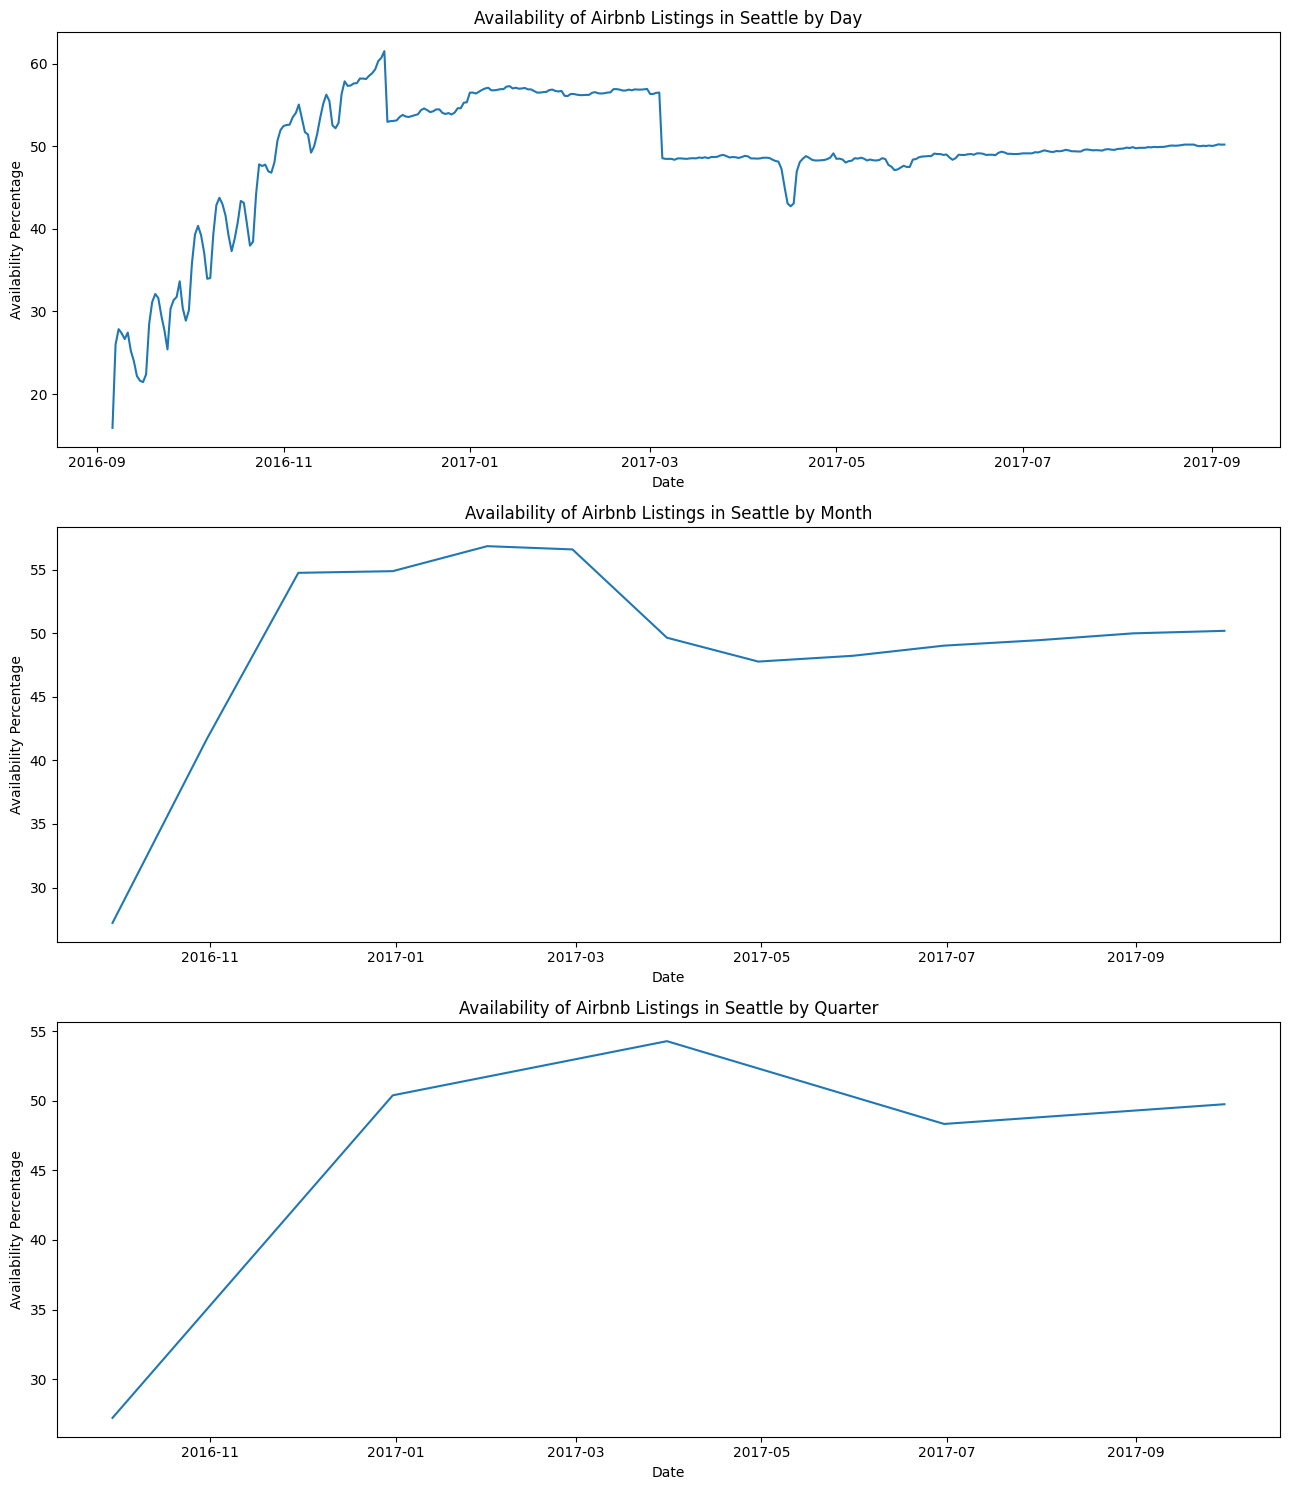

In [10]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
frequencies = ['D', 'M', 'Q']  # List of frequencies: day, month, quarter
titles = ['Day', 'Month', 'Quarter']  # Corresponding titles for each frequency

plt.figure(figsize=(13, 5 * len(frequencies)))  # Adjust the figure size based on the number of frequencies

for i, freq in enumerate(frequencies):
    availability_percentage = calendar_df.groupby(pd.Grouper(key='date', freq=freq))['available'].apply(lambda x: (x == 't').mean() * 100)
    plt.subplot(len(frequencies), 1, i + 1)
    plt.plot(availability_percentage.index, availability_percentage.values)
    plt.xlabel('Date')
    plt.ylabel('Availability Percentage')
    plt.title('Availability of Airbnb Listings in Seattle by {}'.format(titles[i]))

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

    The first graph illustrates that the period from September to January experiences a significantly higher number of bookings compared to other months. This trend is likely due to the holiday season, where more people tend to travel and book accommodations, including Airbnb listings.

    The second graph indicates that from January to March, the number of available Airbnb listings remains relatively consistent. This suggests that there is a stable supply of listings during this period, which could be attributed to a combination of factors such as consistent demand, host availability, and fewer fluctuations in travel patterns.


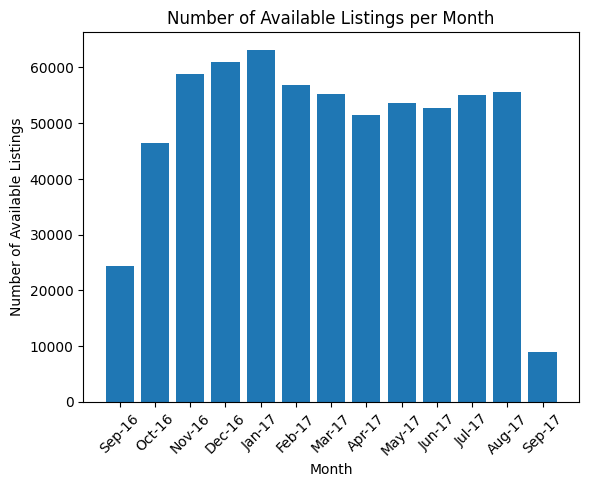

In [11]:
#Let us get the avaible listings per month 
monthly_counts = calendar_df.groupby(calendar_df['date'].dt.to_period('M'))['available'].apply(lambda x: (x == 't').sum())

plt.bar(monthly_counts.index.strftime('%b-%y'), monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings per Month')
plt.xticks(rotation=45)

# Show the plot
plt.show()


###### Check the average monthly price across listings and check for Average price over time

In [12]:
#Convert the price from using $ to a float
calendar_df['price'] = calendar_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

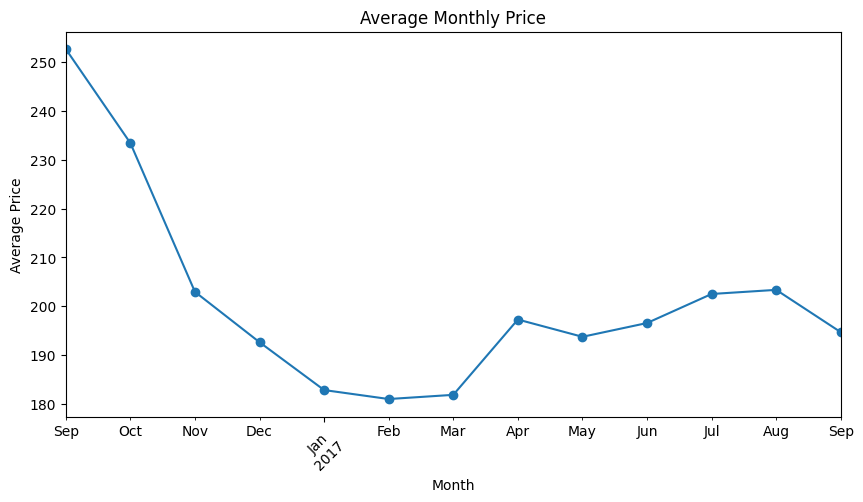

In [13]:
price_monthly_counts = calendar_df.groupby(pd.Grouper(key='date', freq='M'))['price']
price_monthly_counts = price_monthly_counts.mean()
plt.figure(figsize=(10, 5))
price_monthly_counts.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Monthly Price')
plt.xticks(rotation=45)
plt.show()

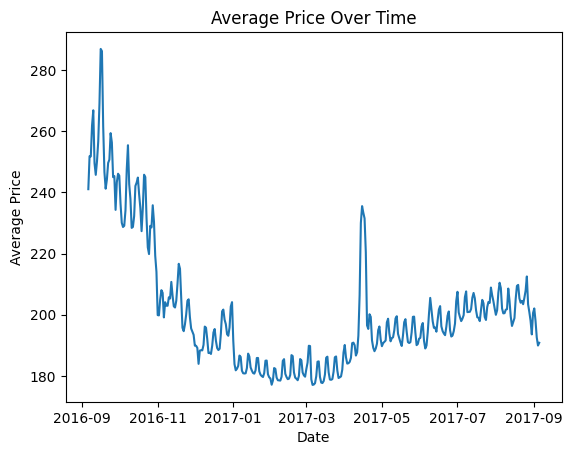

In [14]:
# Group by date and calculate the average price
grouped_df = calendar_df.groupby('date')['price'].mean()

# Plot line plot
plt.plot(grouped_df.index, grouped_df.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time')
plt.show()

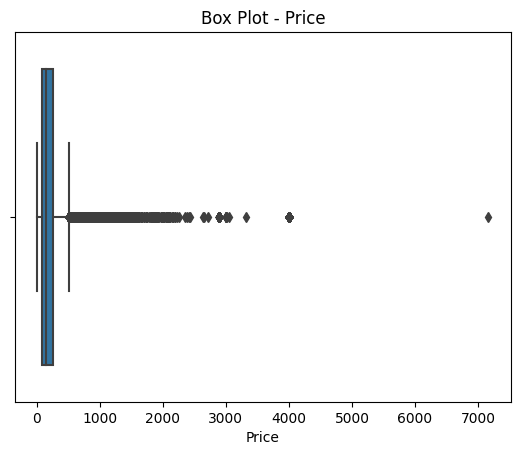

In [15]:
import seaborn as sns

abc = sns.boxplot(x=calendar_df['price'])
plt.xlabel('Price')
plt.title('Box Plot - Price')
plt.show()


In [16]:
calendar_df['price'].describe()

count    643037.000000
mean        198.438909
std         180.142913
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max        7163.000000
Name: price, dtype: float64

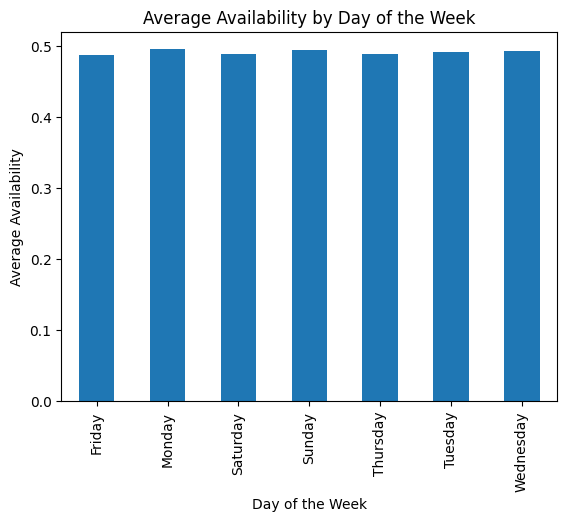

In [19]:
calendar_df['available'] = calendar_df['available'].replace({'f': 0, 't': 1})
filtered_df = calendar_df.copy()

filtered_df['day_of_week'] = filtered_df['date'].dt.day_name()

# Group by day of the week and calculate the availability count
# Calculate average availability by day of the week

availability_by_day = filtered_df.groupby('day_of_week')['available'].mean()

# Plot bar plot of average availability by day of the week
availability_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Availability')
plt.title('Average Availability by Day of the Week')
plt.show()

##### Finding the highest listed price

In [20]:
# Sort the dataframe by price in descending order
sorted_df = calendar_df.sort_values('price', ascending=False)

# Filter the dataframe to get the highest price listing
highest_price_listing = sorted_df.iloc[0]

# Print the results
print(f"Listing ID: {highest_price_listing['listing_id']}")
print(f"Date: {highest_price_listing['date']}")
print(f"Availability: {highest_price_listing['available']} and Price :{highest_price_listing['price']}")

Listing ID: 447826
Date: 2016-10-26 00:00:00
Availability: 1 and Price :7163.0


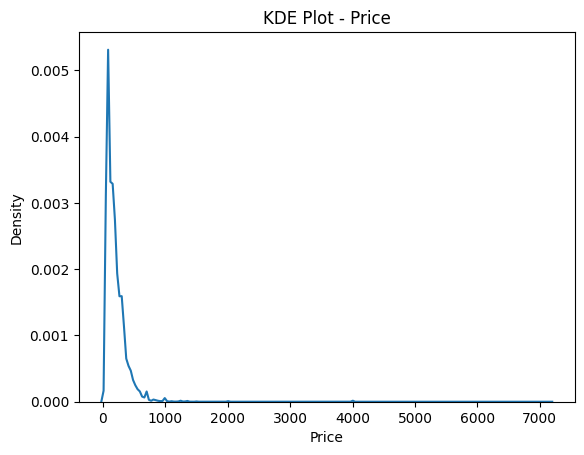

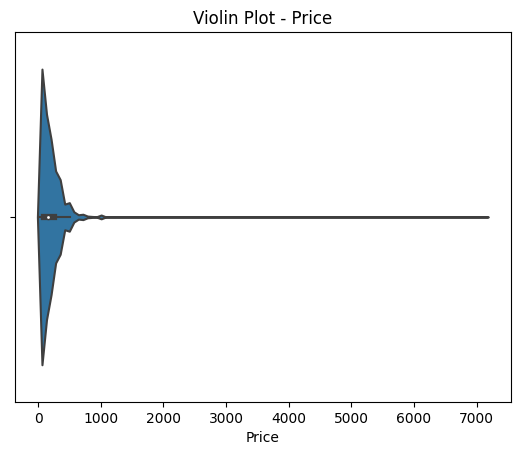

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot
sns.kdeplot(data=calendar_df, x='price')
plt.xlabel('Price')
plt.title('KDE Plot - Price')
plt.show()

# Violin Plot
sns.violinplot(data=calendar_df, x='price')
plt.xlabel('Price')
plt.title('Violin Plot - Price')
plt.show()

##### Details on the price listings over time for an airbnb
- The majority of listings in the Seattle Airbnb database fall within the price range of \\$100  to  \\$300 per night, indicating that this is the most common and popular price range among the listings.

- However, there are a few listings with unusually high prices that exceed \$7000 per night. These listings are considered outliers and are significantly more expensive compared to the majority of other listings.

- The availability of listings is generally higher on weekdays, suggesting that it might be easier to find and book an Airbnb during the weekdays compared to weekends.

- Another interesting observation is that the prices of Airbnbs tend to decrease after the holiday season in December. This drop in prices could be attributed to a decrease in demand and competition among listings following the end of the holiday period. 